In [35]:
%matplotlib inline
from matplotlib import style
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func
from scipy import stats
from flask import Flask, jsonify

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [37]:
# reflect an existing database into a new model
connection = engine.connect()
inspector = inspect(engine)

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
earliest_date = session.query(measurement.date).order_by(measurement.date).first()
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
print (earliest_date)
print (latest_date)

('2010-01-01',)
2017-08-23


In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
precdata = dt.date(2017, 8, 23) - dt.timedelta(days=365)

last_date = session.query(func.max(measurement.date)).scalar()

# The date 1 year ago from the last data point in the database
date_one_yr_ago_dt = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
query_date = date_one_yr_ago_dt.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
# Perform a query to retrieve the date and precipitation scores
precdata = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date >= '2016-08-22').all()
precdata

[('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05'

In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precdata_df = pd.DataFrame(np.array(precdata), columns=['Date', 'Precipitation'])
precdata_df


,Date,Precipitation
0,2016-08-22,0.4
1,2016-08-23,0.0
2,2016-08-24,0.08
3,2016-08-25,0.08
4,2016-08-26,0.0
...,...,...
2232,2017-08-19,0.09
2233,2017-08-20,None
2234,2017-08-21,0.56
2235,2017-08-22,0.5


In [30]:
# Sort the dataframe by date

precdata_df = precdata_df.sort_values(by=['Date'], ascending=True)
precdata_df = precdata_df.set_index('Date')
precdata_df = pd.DataFrame(precdata_df['Precipitation'].astype(float))
precdata_df

,Precipitation
Date,
2016-08-22,0.40
2016-08-22,NaN
2016-08-22,2.32
2016-08-22,NaN
2016-08-22,0.94
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08


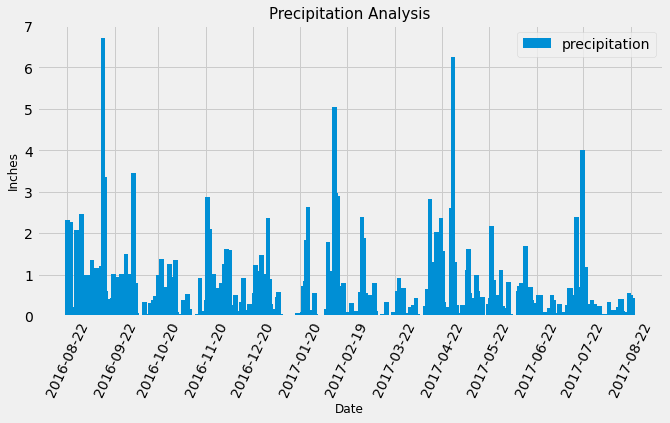

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(precdata_df.index, precdata_df['Precipitation'], label = "precipitation", width=3)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.set_xticks(precdata_df.index)
ax.set_xticklabels(precdata_df.index, rotation=65)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.ylabel("Inches", fontsize = 12)
plt.xlabel("Date", fontsize = 12)
plt.title("Precipitation Analysis", fontsize=15)
plt.legend(loc='best')

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precdata_df.describe()

,Precipitation
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number stations in the dataset

columns = inspector.get_columns('station')
session.query(station.id).count()

9

In [39]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(station.id, measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).all()
stations_df = pd.DataFrame(np.array(stations), columns=['station_id', 'measurement_id', 'station', 'date', 'prcp', 'tobs'])
stations_df['date'] = pd.to_datetime(stations_df.date)

stations_count = stations_df.groupby('station')['tobs'].count()
stations_count = stations_count.to_frame().sort_values(by=['tobs'], ascending=False)
stations_count

/var/folders/d4/zy88nmxn1ks2_csp8cshxcwm0000gn/T/ipykernel_10814/1871586403.py:3: SAWarning: SELECT statement has a cartesian product between FROM element(s) "station" and FROM element "measurement".  Apply join condition(s) between each element to resolve.
  stations = session.query(station.id, measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).all()


,tobs
station,
USC00519281,24948
USC00519397,24516
USC00513117,24381
USC00519523,24021
USC00516128,23508
USC00514830,19818
USC00511918,17811
USC00517948,12348
USC00518838,4599


In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_act = stations_df.loc[stations_df.station == 'USC00519281',:]
low_temp = station_act.tobs.min()
print(f"Lowest temperature by station USC00519281 is {low_temp} F,")        
high_temp = station_act.tobs.max()
print(f"Highest temperature by station USC00519281 is {high_temp} F,")  
avg_temp = station_act.tobs.mean().round(1)
print(f"Average temperature by station USC00519281 is {avg_temp} F.") 

Lowest temperature by station USC00519281 is 54.0 F,
Highest temperature by station USC00519281 is 85.0 F,
Average temperature by station USC00519281 is 71.7 F.


Text(0.5, 1.0, 'Temp Observation')

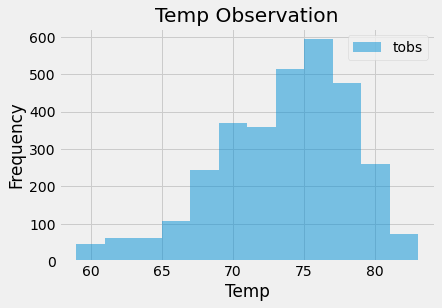

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_year = station_act[['date', 'tobs']]
temp_year = temp_year.loc[temp_year.date > '2016-08-22']
temp_year = temp_year.set_index('date')
ax = temp_year.plot.hist(bins=12, alpha=0.5)
plt.xlabel('Temp')
plt.title('Temp Observation')

# Close session

In [43]:
# Close Session
session.close()